In [4]:
## import basic libraries to handle data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
## import data
data_path = "data/abalone.csv"
abalone_data = pd.read_csv(data_path)
abalone_data.head(5)

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [49]:
## import data
#abalone_data = pd.read_csv('http://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
#abalone_data.head(5)

In [12]:
## Explore data
np_abalone_data = np.array(abalone_data)
print(np_abalone_data[0:5,:])

[['M' 0.35 0.265 0.09 0.2255 0.0995 0.0485 0.07 7]
 ['F' 0.53 0.42 0.135 0.677 0.2565 0.1415 0.21 9]
 ['M' 0.44 0.365 0.125 0.516 0.2155 0.114 0.155 10]
 ['I' 0.33 0.255 0.08 0.205 0.0895 0.0395 0.055 7]
 ['I' 0.425 0.3 0.095 0.3515 0.141 0.0775 0.12 8]]


In [19]:
datax = np_abalone_data[:,:]
datay = np_abalone_data[:,0]
print(datax[0:5,:])
print(datay[0:10])

[[0.35 0.265 0.09 0.2255 0.0995 0.0485 0.07 7]
 [0.53 0.42 0.135 0.677 0.2565 0.1415 0.21 9]
 [0.44 0.365 0.125 0.516 0.2155 0.114 0.155 10]
 [0.33 0.255 0.08 0.205 0.0895 0.0395 0.055 7]
 [0.425 0.3 0.095 0.3515 0.141 0.0775 0.12 8]]
['M' 'F' 'M' 'I' 'I' 'F' 'F' 'M' 'F' 'F']


In [20]:
from sklearn.model_selection import train_test_split
trnx, tstx, trny, tsty = train_test_split(datax, datay, test_size=0.3)
print(trnx.shape, tstx.shape, trny.shape, tsty.shape)

(2923, 8) (1253, 8) (2923,) (1253,)


In [23]:
from sklearn.preprocessing import MinMaxScaler # Step 1
scaler = MinMaxScaler() # Step 2
scaler.fit(trnx) # Step 3
trnx_scale = scaler.transform(trnx) # Step 4
tstx_scale = scaler.transform(tstx) # Step 4
print(np.min(trnx_scale[:,0]), np.max(trnx_scale[:,0]))
print(np.min(tstx_scale[:,0]), np.max(tstx_scale[:,0]))

0.0 1.0
0.047297297297297314 0.9391891891891893


In [28]:
## kNN
from sklearn import neighbors
k=5
knn_model = neighbors.KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X=trnx, y=trny)

KNeighborsClassifier()

In [29]:
knn_pred_trn = knn_model.predict(X=trnx)
knn_pred_tst = knn_model.predict(X=tstx)

In [30]:
print(knn_pred_trn)
print(knn_pred_tst)

['I' 'F' 'F' ... 'M' 'M' 'F']
['M' 'I' 'F' ... 'M' 'M' 'F']


In [31]:
from sklearn import metrics
print(metrics.accuracy_score(trny, knn_pred_trn))
print(metrics.accuracy_score(tsty, knn_pred_tst))

0.6835443037974683
0.5379090183559457


In [33]:
## Decision Tree
from sklearn import tree
tree_model = tree.DecisionTreeClassifier(max_depth=4, min_samples_split=3)
tree_model.fit(X=trnx, y=trny)

DecisionTreeClassifier(max_depth=4, min_samples_split=3)

In [34]:
tree_pred = tree_model.predict(X=tstx)

In [35]:
tree_model.feature_importances_

array([0.03180343, 0.03241949, 0.0256352 , 0.0495374 , 0.0120961 ,
       0.62911045, 0.03128795, 0.18810997])

In [36]:
from sklearn.tree import export_graphviz
export_graphviz(tree_model, out_file='tree.dot')

[Text(167.4, 195.696, 'X[5] <= 0.151\ngini = 0.665\nsamples = 2923\nvalue = [912, 936, 1075]'),
 Text(83.7, 152.208, 'X[7] <= 8.5\ngini = 0.548\nsamples = 1268\nvalue = [206, 776, 286]'),
 Text(41.85, 108.72, 'X[6] <= 0.128\ngini = 0.388\nsamples = 809\nvalue = [63, 616, 130]'),
 Text(20.925, 65.232, 'X[2] <= 0.113\ngini = 0.294\nsamples = 576\nvalue = [29, 478, 69]'),
 Text(10.4625, 21.744, 'gini = 0.261\nsamples = 518\nvalue = [19, 441, 58]'),
 Text(31.387500000000003, 21.744, 'gini = 0.527\nsamples = 58\nvalue = [10, 37, 11]'),
 Text(62.775000000000006, 65.232, 'X[0] <= 0.438\ngini = 0.559\nsamples = 233\nvalue = [34, 138, 61]'),
 Text(52.3125, 21.744, 'gini = 0.643\nsamples = 14\nvalue = [6, 3, 5]'),
 Text(73.2375, 21.744, 'gini = 0.538\nsamples = 219\nvalue = [28, 135, 56]'),
 Text(125.55000000000001, 108.72, 'X[7] <= 9.5\ngini = 0.666\nsamples = 459\nvalue = [143, 160, 156]'),
 Text(104.625, 65.232, 'X[0] <= 0.453\ngini = 0.62\nsamples = 171\nvalue = [35, 86, 50]'),
 Text(94.1625

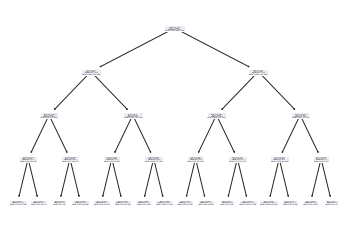

In [37]:
tree.plot_tree(tree_model)

In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix(tsty, tree_model.predict(tstx))

array([[ 74,  43, 278],
       [ 40, 307,  59],
       [ 54,  74, 324]], dtype=int64)

In [39]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier()
tree_model.fit(X=trnx, y=trny)

DecisionTreeClassifier()

In [40]:
## Ensemble
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(max_depth=15, n_estimators=100, random_state=0)
rf_model.fit(X=trnx, y=trny)

RandomForestClassifier(max_depth=15, random_state=0)

In [41]:
rf_pred = rf_model.predict(X=tstx)

In [42]:
from sklearn import metrics
print(metrics.accuracy_score(tsty, rf_pred))

0.5554668794892259


In [43]:
from sklearn.ensemble import GradientBoostingClassifier
gbm_model = GradientBoostingClassifier(max_depth=3, n_estimators = 30, random_state = 0)
gbm_model.fit(X=trnx, y=trny)

GradientBoostingClassifier(n_estimators=30, random_state=0)

In [44]:
gbm_pred = gbm_model.predict(X=tstx)

In [45]:
from sklearn import metrics
print(metrics.accuracy_score(tsty, gbm_pred))

0.5722266560255387


In [46]:
## Performance Evaluation
from sklearn.metrics import accuracy_score
acc = np.array([accuracy_score(tsty, tree_pred),accuracy_score(tsty, gbm_pred)])
print(acc)

[0.56264964 0.57222666]


In [47]:
from sklearn.metrics import confusion_matrix
confusion_matrix(tsty, tree_pred)

array([[ 74,  43, 278],
       [ 40, 307,  59],
       [ 54,  74, 324]], dtype=int64)

In [48]:
confusion_matrix(tsty, gbm_pred)

array([[140,  44, 211],
       [ 22, 322,  62],
       [112,  85, 255]], dtype=int64)